## Homework 2

- Build and train a MLP Model to classify Mnist dataset

 1- MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.
 
 2- Normalize data by rescaling them to (0,1) 
 
 3- Convert label arrays to 1-hot representation (`keras.utils.to_categorical`)
 
 4- Define Model
    * Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
    * Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
    * Outout Layer: Fully Connected + Softmax Activition
 
 
- Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset:

    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Dense(128, activation='relu')
    5. Dense(num_classes, activation='softmax')

    Also build another model with BatchNormalization and Dropout.
    Compare these two CNN + MLP models performance for test data

## <b>Step 0:</b> Import tools and load data

In [45]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical

In [46]:
#import 6000 images from mnist data set
(X_train, y_train), (X_test, y_test) = mnist.load_data()

## <b>Step 1:</b> MLP Network accepts 1D data. So we should flatten our 2D image, then print the dimension of the result arrays.

In [47]:
print(X_train.shape)

(60000, 28, 28)


In [48]:
X_train = X_train.reshape(X_train.shape[0],28**2)
X_test = X_test.reshape(X_test.shape[0],28**2)
print(X_train.shape)

(60000, 784)


## <b>Step 2:</b> Normalize data by rescaling them to (0,1) 

In [49]:
min_X, max_X = min(X_train[0]), max(X_train[0])
min_X, max_X

(0, 255)

#### Each image has Intensity from 0 to 255

In [50]:
X_train = X_train / (max_X - min_X)
X_test = X_train / (max_X - min_X)

#### Data is normalized from 0 to 1 now

In [51]:
min(X_train[0]), max(X_train[0])

(0.0, 1.0)

## <b>Step 3:</b> Convert label arrays to 1-hot representation

In [52]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## <b>Step 4:</b> Define Model

#### Layers
* Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
 - Dense(n) is a fully-connected layer with n hidden units (Neurons).
* Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
* Outout Layer: Fully Connected + Softmax Activition

In [53]:
model = Sequential()
# Hidden Layer 1: Fully Conncted + Relu Activition (e.g. 512 Nuerons)
model.add(Dense(512, input_shape = (784,), activation = 'relu'))
# Hidden Layer 2: Fully Connected + Relu Activition (e.g. 512 Neurons)
model.add(Dense(512, activation='relu'))
# Outout Layer: Fully Connected + Softmax Activition
model.add(Dense(10, activation='softmax'))
# compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
None


In [54]:
history = model.fit(X_train, y_train, epochs=10, batch_size=200)

Epoch 1/10
60000/60000 [==============================] - 3s 47us/step - loss: 0.2458 - acc: 0.9290
Epoch 2/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0841 - acc: 0.9742
Epoch 3/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0531 - acc: 0.9831
Epoch 4/10
60000/60000 [==============================] - 3s 42us/step - loss: 0.0378 - acc: 0.9880
Epoch 5/10
60000/60000 [==============================] - 3s 43us/step - loss: 0.0267 - acc: 0.9919
Epoch 6/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0186 - acc: 0.9939
Epoch 7/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0157 - acc: 0.9949
Epoch 8/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0152 - acc: 0.9948
Epoch 9/10
60000/60000 [==============================] - 2s 41us/step - loss: 0.0116 - acc: 0.9960
Epoch 10/10
60000/60000 [==============================] - 2s 40us/step - loss: 0.0120 - acc: 0.9960

In [55]:
history.history.keys()

dict_keys(['loss', 'acc'])

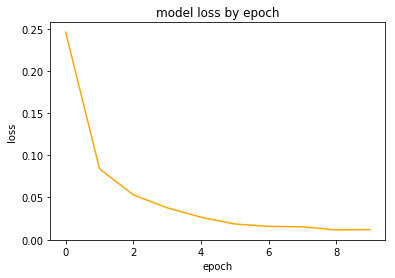

In [56]:
plt.plot(history.history['loss'], c='orange')
plt.title('model loss by epoch')
plt.xlabel('epoch')
plt.ylabel('loss')

plt.show()

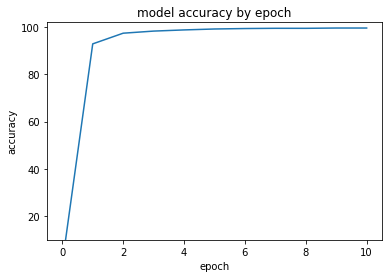

In [57]:
plt.plot([0]+[acc*100 for acc in history.history['acc']])
plt.title('model accuracy by epoch')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim(10, 102)

plt.show()

## <b>Next Steps:</b> 

Build and train a CNN+MLP deep learning model with Keras with followings specs for MNIST dataset

    1. Conv2D(32, kernel_size=(3, 3), activation='relu')
    2. Conv2D(64, kernel_size=(3, 3), activation='relu')
    3. MaxPooling2D(pool_size=(2, 2))
    4. Dense(128, activation='relu')
    5. Dense(num_classes, activation='softmax')

    Also build another model with BatchNormalization and Dropout.
    Compare these two CNN + MLP models performance for test data

In [60]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape = (784,)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
print(model.summary())

ValueError: Input 0 is incompatible with layer conv2d_6: expected ndim=4, found ndim=2